<a href="https://colab.research.google.com/github/kunal-ppatil/Deep_learning_projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train),(X_test, Y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train
)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(X_train[10].shape)

(28, 28)


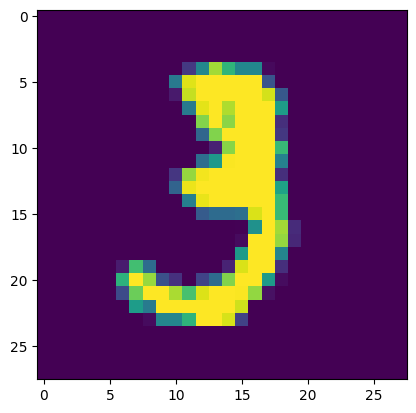

3


In [ ]:
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#scaling the value
X_train=X_train/255
X_test= X_test/255

In [ ]:
#setting up the layers for the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8505 - loss: 0.5133
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9545 - loss: 0.1505
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9789 - loss: 0.0674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9886 - loss: 0.0386
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0324
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0300


In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1379
0.9703999757766724


In [ ]:
print(X_test.shape)

(10000, 28, 28)


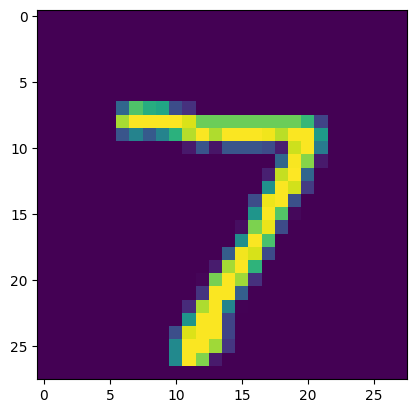

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[4.7116101e-02 1.9885274e-04 5.3548239e-02 8.0064332e-01 1.5468295e-10
 5.7454500e-04 8.9731514e-11 9.9999881e-01 5.9599295e-04 7.9362756e-03]


In [ ]:
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
conf_mat=confusion_matrix(Y_test,Y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 963    1    2    1    2    2    2    2    2    3]
 [   0 1120    6    1    0    1    4    0    3    0]
 [   3    2 1005    8    2    0    4    7    1    0]
 [   0    0    6  982    3    3    0    6    3    7]
 [   1    0    2    1  962    0    4    3    2    7]
 [   3    0    0   10    1  869    3    1    3    2]
 [   6    3    1    1    5    4  934    3    1    0]
 [   1    3   12    2    2    0    0  996    2   10]
 [   3    5   11   20    3    5    4    2  914    7]
 [   1    2    1    8   22    7    1    5    3  959]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

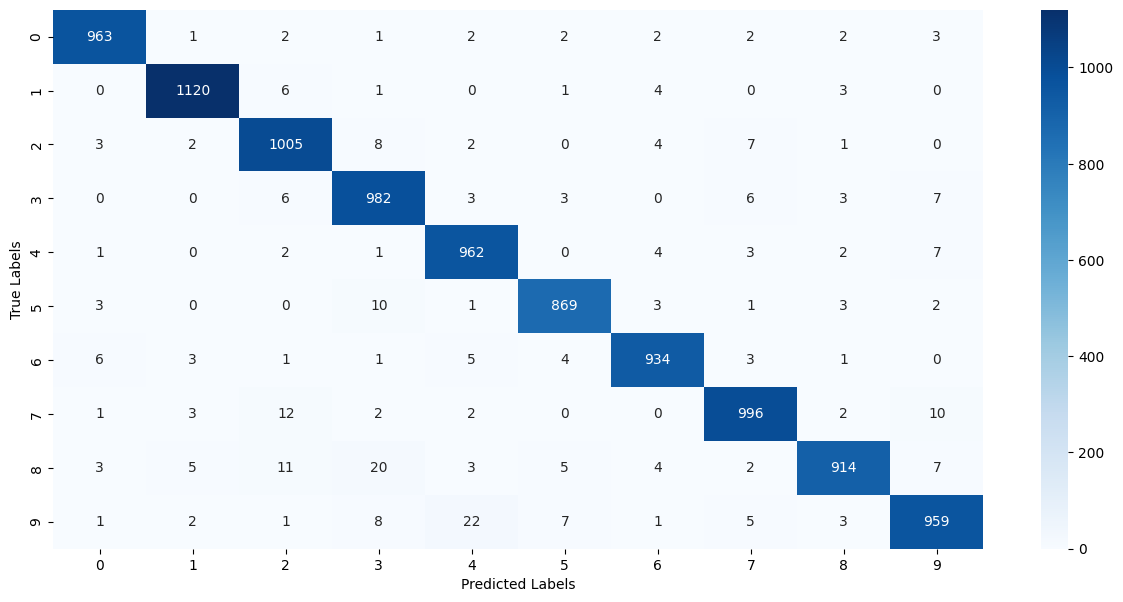

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path='/content/Screenshot 2025-11-16 215701.png'
input_image=cv2.imread(input_image_path)


In [ ]:
type(input_image)
print(input_image)

[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [242 242 242]
  [237 237 237]]

 [[119 119 119]
  [120 120 120]
  [120 120 120]
  ...
  [119 119 119]
  [117 117 117]
  [126 126 126]]

 [[ 23   0  19]
  [ 24   0  19]
  [ 24   0  19]
  ...
  [ 23   0  19]
  [ 16   0  13]
  [ 23  23  23]]

 ...

 [[ 81   0  65]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 81   0  66]
  [ 55   0  45]
  [ 24  24  24]]

 [[ 77   0  62]
  [ 81   0  65]
  [ 81   0  65]
  ...
  [ 78   0  63]
  [ 53   0  43]
  [ 24  24  24]]

 [[ 39   0  32]
  [ 41   0  33]
  [ 41   0  33]
  ...
  [ 39   0  32]
  [ 27   0  22]
  [ 24  24  24]]]


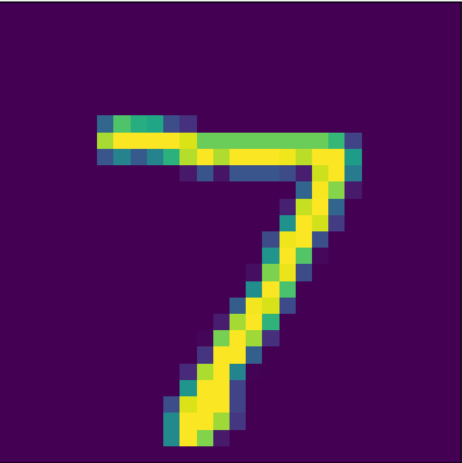

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(463, 462, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(463, 462)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.8192160e-02 1.4793112e-04 9.5452130e-01 9.9562180e-01 1.6270996e-12
  4.4198908e-04 3.2413105e-08 9.9161410e-01 7.4363017e-04 6.2257604e-06]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


In [ ]:
#predictive system
input_image_path=input('Path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The handwritten digit is recognized as', input_pred_label)